<a name="1"></a>
## Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.


In [221]:
import matplotlib.pyplot as plt
from utils import load_data
import copy

## Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

## Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [222]:
# load the dataset
x_train, y_train = load_data()

In [223]:
# print x_train
print("Type of x_train:",type(x_train))
print("First 10 elements of x_train are:\n", x_train[:10]) 

Type of x_train: <class 'numpy.ndarray'>
First 10 elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598 8.3829 7.4764 8.5781 6.4862 5.0546]


In [224]:
# print y_train
print("Type of y_train: ",type(y_train))
print("First 10 elements of y_train are:\n", y_train[:10])  

Type of y_train:  <class 'numpy.ndarray'>
First 10 elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233 11.886   4.3483 12.      6.5987
  3.8166]


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `x_train` and `y_train` and see how many training examples you have in your dataset.

In [225]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


The city population array has 97 data points, and the monthly average profits also has 97 data points. These are NumPy 1D arrays.

#### Visualize your data

It is often useful to understand the data by visualizing it. 
- For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). 
- Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales).When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.


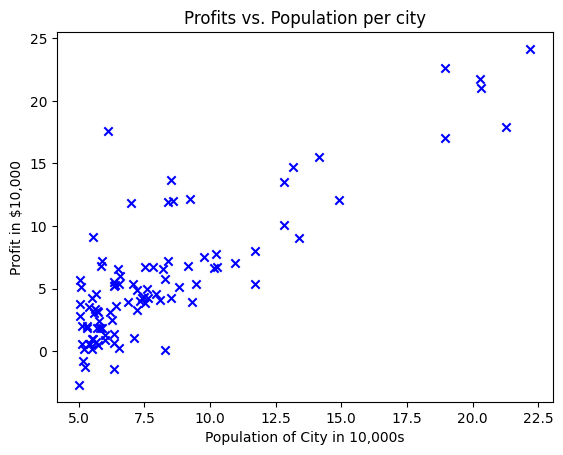

In [226]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='b') 
# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

<a name="5"></a>
## Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

Please complete the `compute_cost()` function below to compute the cost $J(w,b)$.

<a name="ex01"></a>
### Exercise 1

Complete the `compute_cost` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [227]:
def compute_cost(x, y, w, b): 
    # number of training examples
    m = x.shape[0] 
    cost=0
    
    for i in range(m):
        f_wb = w*x[i]+b
        cost += (f_wb - y[i])**2

    cost /= 2*m
    return cost

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
   * You can represent a summation operator eg: $h = \sum\limits_{i = 0}^{m-1} 2i$ in code as follows:
     ```python 
    h = 0
    for i in range(m):
        h = h + 2*i
    ```
  
   * In this case, you can iterate over all the examples in `x` using a for loop and add the `cost` from each iteration to a variable (`cost_sum`) initialized outside the loop.

   * Then, you can return the `total_cost` as `cost_sum` divided by `2m`.
     
    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
    * Here's how you can structure the overall implementation for this function
    ```python 
    def compute_cost(x, y, w, b):
        # number of training examples
        m = x.shape[0] 
    
        # You need to return this variable correctly
        total_cost = 0
    
        ### START CODE HERE ###  
        # Variable to keep track of sum of cost from each example
        cost_sum = 0
    
        # Loop over training examples
        for i in range(m):
            # Your code here to get the prediction f_wb for the ith example
            f_wb = 
            # Your code here to get the cost associated with the ith example
            cost = 
        
            # Add to sum of cost for each example
            cost_sum = cost_sum + cost 

        # Get the total cost as the sum divided by (2*m)
        total_cost = (1 / (2 * m)) * cost_sum
        ### END CODE HERE ### 

        return total_cost
    ```
    
    If you're still stuck, you can check the hints presented below to figure out how to calculate `f_wb` and `cost`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; For scalars $a$, $b$ and $c$ (<code>x[i]</code>, <code>w</code> and <code>b</code> are all scalars), you can calculate the equation $h = ab + c$ in code as <code>h = a * b + c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute f_wb as <code>f_wb = w * x[i] + b </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate cost</b></font></summary>
          &emsp; &emsp; You can calculate the square of a variable z as z**2
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate cost</b></font></summary>
              &emsp; &emsp; You can compute cost as <code>cost = (f_wb - y[i]) ** 2</code>
          </details>
    </details>
        
    </details>

</details>

    


You can check if your implementation was correct by running the following test code:

In [228]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2.0
initial_b = 1.0

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost at initial w (zeros): {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

Cost at initial w (zeros): 75.203
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w (zeros):<b> 75.203 </td> 
  </tr>
</table>

<a name="6"></a>
## 6 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

<a name="ex02"></a>
### Exercise 2

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [229]:
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]
    dj_dw = 0.0
    dj_db = 0.0

    for i in range(m):
        f_wb = w*x[i] + b
        error = f_wb-y[i]
        dj_dw += error * x[i]
        dj_db += error
        
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
       
    * You can represent a summation operator eg: $h = \sum\limits_{i = 0}^{m-1} 2i$ in code as follows:
     ```python 
    h = 0
    for i in range(m):
        h = h + 2*i
    ```
    
    * In this case, you can iterate over all the examples in `x` using a for loop and for each example, keep adding the gradient from that example to the variables `dj_dw` and `dj_db` which are initialized outside the loop. 

   * Then, you can return `dj_dw` and `dj_db` both divided by `m`.    
    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
    * Here's how you can structure the overall implementation for this function
    ```python 
    def compute_gradient(x, y, w, b): 
        """
        Computes the gradient for linear regression 
        Args:
          x (ndarray): Shape (m,) Input to the model (Population of cities) 
          y (ndarray): Shape (m,) Label (Actual profits for the cities)
          w, b (scalar): Parameters of the model  
        Returns
          dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
          dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
         """
    
        # Number of training examples
        m = x.shape[0]
    
        # You need to return the following variables correctly
        dj_dw = 0
        dj_db = 0
    
        ### START CODE HERE ### 
        # Loop over examples
        for i in range(m):  
            # Your code here to get prediction f_wb for the ith example
            f_wb = 
            
            # Your code here to get the gradient for w from the ith example 
            dj_dw_i = 
        
            # Your code here to get the gradient for b from the ith example 
            dj_db_i = 
     
            # Update dj_db : In Python, a += 1  is the same as a = a + 1
            dj_db += dj_db_i
        
            # Update dj_dw
            dj_dw += dj_dw_i
    
        # Divide both dj_dw and dj_db by m
        dj_dw = dj_dw / m
        dj_db = dj_db / m
        ### END CODE HERE ### 
        
        return dj_dw, dj_db
    ```
    
    If you're still stuck, you can check the hints presented below to figure out how to calculate `f_wb` and `cost`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; You did this in the previous exercise! For scalars $a$, $b$ and $c$ (<code>x[i]</code>, <code>w</code> and <code>b</code> are all scalars), you can calculate the equation $h = ab + c$ in code as <code>h = a * b + c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute f_wb as <code>f_wb = w * x[i] + b </code>
           </details>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_dw_i</b></font></summary>
           &emsp; &emsp; For scalars $a$, $b$ and $c$ (<code>f_wb</code>, <code>y[i]</code> and <code>x[i]</code> are all scalars), you can calculate the equation $h = (a - b)c$ in code as <code>h = (a-b)*c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute dj_dw_i as <code>dj_dw_i = (f_wb - y[i]) * x[i] </code>
           </details>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_db_i</b></font></summary>
             &emsp; &emsp; You can compute dj_db_i as <code> dj_db_i = f_wb - y[i] </code>
    </details>
        
    </details>

</details>

    


Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$,$b$.

In [230]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


Now let's run the gradient descent algorithm implemented above on our dataset.

**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at initial , b (zeros)<b></td>
    <td> -65.32884975 -5.83913505154639</td> 
  </tr>
</table>

In [231]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at test w<b></td>
    <td> -47.41610118 -4.007175051546391</td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [232]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = x.shape[0]
    J_hist = []
    w_hist = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        #save the parameter w and the corresponding cost to it
        cost = cost_function(x, y, w, b)
        J_hist.append(cost)
        w_hist.append(w)

        if i % ((num_iters)/50) == 0:
            print(f'Iteration: {i}, Cost: {cost:0.2f}')

    return w, b, J_hist, w_hist

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

Iteration: 0, Cost: 6.74
Iteration: 50, Cost: 5.67
Iteration: 100, Cost: 5.48
Iteration: 150, Cost: 5.31
Iteration: 200, Cost: 5.17
Iteration: 250, Cost: 5.06
Iteration: 300, Cost: 4.96
Iteration: 350, Cost: 4.88
Iteration: 400, Cost: 4.82
Iteration: 450, Cost: 4.76
Iteration: 500, Cost: 4.71
Iteration: 550, Cost: 4.67
Iteration: 600, Cost: 4.64
Iteration: 650, Cost: 4.61
Iteration: 700, Cost: 4.59
Iteration: 750, Cost: 4.57
Iteration: 800, Cost: 4.56
Iteration: 850, Cost: 4.54
Iteration: 900, Cost: 4.53
Iteration: 950, Cost: 4.52
Iteration: 1000, Cost: 4.52
Iteration: 1050, Cost: 4.51
Iteration: 1100, Cost: 4.50
Iteration: 1150, Cost: 4.50
Iteration: 1200, Cost: 4.50
Iteration: 1250, Cost: 4.49
Iteration: 1300, Cost: 4.49
Iteration: 1350, Cost: 4.49
Iteration: 1400, Cost: 4.49
Iteration: 1450, Cost: 4.48
Iteration: 1500, Cost: 4.48
Iteration: 1550, Cost: 4.48
Iteration: 1600, Cost: 4.48
Iteration: 1650, Cost: 4.48
Iteration: 1700, Cost: 4.48
Iteration: 1750, Cost: 4.48
Iteration: 1800

Text(0.5, 0, 'W')

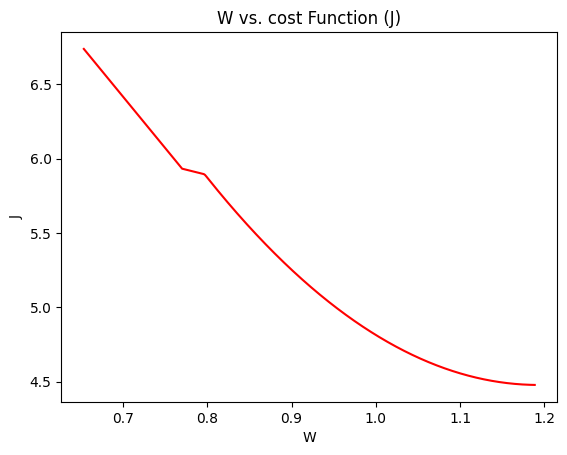

In [233]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 2500
alpha = 0.01

w,b,J_history,w_history = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print(f"w,b found by gradient descent: {w}, {b} with minimum cost =",compute_cost(x_train,y_train,w,b))

plt.plot(w_history,J_history,c='r')
# Set the title
plt.title("W vs. cost Function (J)")
# Set the y-axis label
plt.ylabel('J')
# Set the x-axis label
plt.xlabel('W')

**Expected Output**:
<table>
  <tr>
    <td> <b> w, b found by gradient descent<b></td>
    <td> 1.16636235 -3.63029143940436</td> 
  </tr>
</table>

We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [234]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

We will now plot the predicted values to see the linear fit.

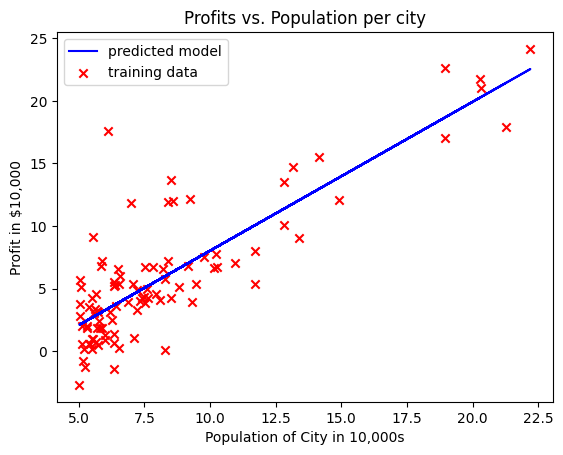

In [235]:
plt.plot(x_train, predicted, c = 'b',label='predicted model')
plt.scatter(x_train, y_train, marker='x', c='r',label = 'training data') 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.legend()

Your final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`


For population = 35,000, we predict a profit of $139775.72
For population = 70,000, we predict a profit of $44684.24


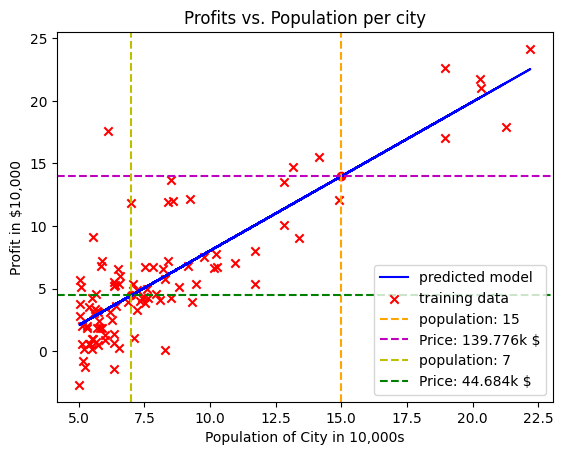

In [236]:
predict1 = 15 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

plt.plot(x_train, predicted, c = 'b',label='predicted model')
plt.scatter(x_train, y_train, marker='x', c='r',label = 'training data') 

plt.axvline(x=15, color='orange', linestyle='--', label=f'population: {15}')
plt.axhline(y=predict1, color='m', linestyle='--', label=f'Price: {predict1*10:0.3f}k $')
plt.scatter(15, predict1, marker='o', color='r')

plt.axvline(x=7, color='y', linestyle='--', label=f'population: {7}')
plt.axhline(y=predict2, color='g', linestyle='--', label=f'Price: {predict2*10:0.3f}k $')
plt.scatter(7, predict2, marker='o', color='r')

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.legend()

**Expected Output**:
<table>
  <tr>
    <td> <b> For population = 35,000, we predict a profit of<b></td>
    <td> $4519.77 </td> 
  </tr>
  
  <tr>
    <td> <b> For population = 70,000, we predict a profit of<b></td>
    <td> $45342.45 </td> 
  </tr>
</table>